### Imports & Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('Titanic/train.csv', index_col='PassengerId')
test = pd.read_csv('Titanic/test.csv', index_col='PassengerId')

### Exploring Data and EDA

In [3]:
# Show train dataframe
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Show test dataframe
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# dfs info.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [7]:
# Check NANs in Train Dataset
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
# firstly, we can drop the 2 records with NaN Embarked value
train = train[train['Embarked'].notnull()]

In [9]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

- We will have to deal with `Age`.
- `Cabin` feature is filled with NaNs and useless feature.

In [10]:
# Check NANs in Test Dataset
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

- We will have to deal with `Age`, `Fare` and `Cabin` NaNs

In [11]:
# Check Duplicates
train.duplicated().sum()

0

In [12]:
test.duplicated().sum()

0

- We have `no duplicated` records

In [13]:
# Survived vs Not
train['Survived'].value_counts()/train.shape[0]

0    0.617548
1    0.382452
Name: Survived, dtype: float64

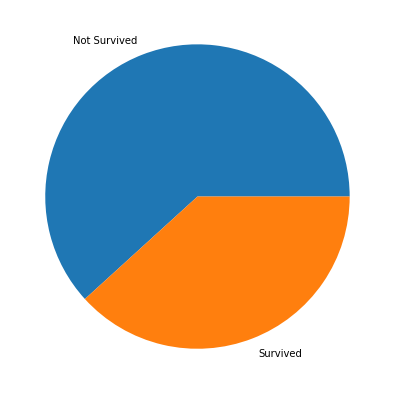

In [14]:
# Survived vs Not
plt.figure(figsize=(7,7))
plt.pie(train['Survived'].value_counts(), labels=['Not Survived', 'Survived']);

- 61.8% Survived and 38.2% Not Survived 

In [15]:
train['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

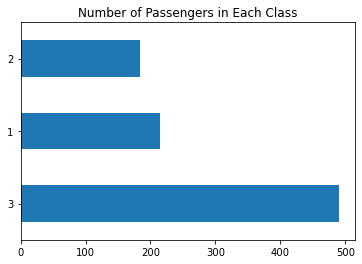

In [16]:
train['Pclass'].value_counts().plot(kind='barh');
plt.title('Number of Passengers in Each Class');

- Most Passengers were in class 3

In [17]:
train.groupby(['Pclass'])['Survived'].value_counts(sort=False)

Pclass  Survived
1       0            80
        1           134
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

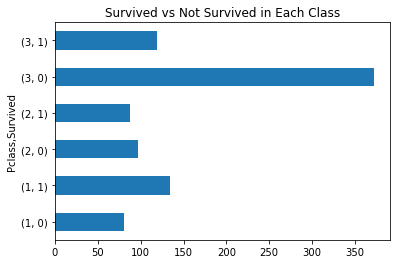

In [18]:
train.groupby(['Pclass'])['Survived'].value_counts(sort=False).plot(kind='barh');
plt.title('Survived vs Not Survived in Each Class');

- It seems that tha `most` of `class 3` `died`, and `high number` of `class 1 survived`.
- This feature will be `so important` in prediction.

In [19]:
train.groupby(['Sex'])['Survived'].value_counts(sort=False)

Sex     Survived
female  0            81
        1           231
male    0           468
        1           109
Name: Survived, dtype: int64

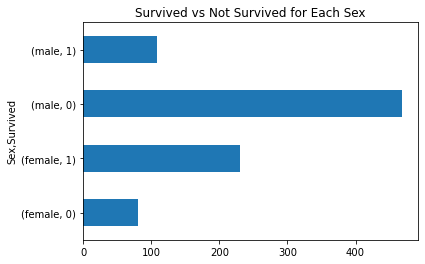

In [20]:
train.groupby(['Sex'])['Survived'].value_counts(sort=False).plot(kind='barh');
plt.title('Survived vs Not Survived for Each Sex');

- It seems that `most females Survived`, but `most males died`.
- This feature will be `so important` in prediction.

In [21]:
train.groupby(['SibSp'])['Survived'].value_counts(sort=False)

SibSp  Survived
0      0           398
       1           208
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

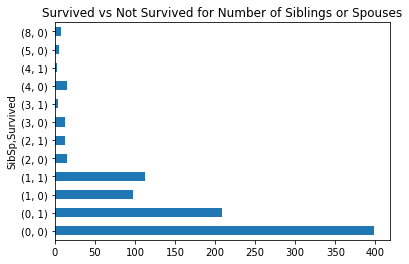

In [22]:
train.groupby(['SibSp'])['Survived'].value_counts(sort=False).plot(kind='barh');
plt.title('Survived vs Not Survived for Number of Siblings or Spouses');

- Almost `all passengers` with `high` number of `Siblings or Spouses died`.
- Most of passengers with `zero Siblings or Spouses` also `died`.
- In between the numbers are close.

In [23]:
train.groupby(['Parch'])['Survived'].value_counts(sort=False)

Parch  Survived
0      0           445
       1           231
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

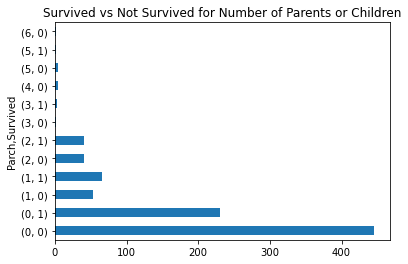

In [24]:
train.groupby(['Parch'])['Survived'].value_counts(sort=False).plot(kind='barh');
plt.title('Survived vs Not Survived for Number of Parents or Children');

- Most of passengers number of Parents or Children above 3 `died`.
- Most of passengers with `zero Parents or Children` also `died`.
- In between the numbers are close.

- Number of Siblings or Spouses & Parents or Children can be `mixed` and give a valuable feature of `number of family`.

In [25]:
train['Fare'].astype(int).value_counts(sort=False)

0       15
4        1
5        1
6       11
7      213
      ... 
227      4
247      2
262      2
263      4
512      3
Name: Fare, Length: 90, dtype: int64

In [26]:
train['Fare'].astype(int).describe()

count    889.000000
mean      31.677165
std       49.706915
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

- Although it's `not logical` that `15 passengers` travelled with `0 fare`, we can `change` the fare into catagories `describe the affordability status` of each passenger.

In [27]:
train['Embarked'].value_counts()/train.shape[0]

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [28]:
train.groupby(['Embarked'])['Survived'].value_counts(sort=False)

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

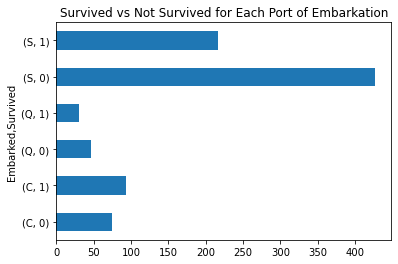

In [29]:
train.groupby(['Embarked'])['Survived'].value_counts(sort=False).plot(kind='barh');
plt.title('Survived vs Not Survived for Each Port of Embarkation');

- Number of survivore and deads for each Port of Embarkation are `close`, but `most of Southampton Passengers died`.

In [30]:
train.groupby(['Pclass'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,184.0,38.105543,14.778904,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [31]:
train.groupby(['Pclass'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,184.0,38.105543,14.778904,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


- Ages has outliers, so it can be `imputed using median` not mean.

### Cleaning Datasets of NaNs & Useless Feature

In [32]:
# Taking copies
train_copy = train.copy()
test_copy = test.copy()

In [33]:
# Age imputed using median age of each Pclass
for i in range(1,4):
    train_copy.loc[(train_copy['Pclass'] == i) & (train_copy['Age'].isnull()), 'Age'] = train_copy.loc[train_copy['Pclass'] == i, 'Age'].median()
    test_copy.loc[(test_copy['Pclass'] == i) & (test_copy['Age'].isnull()), 'Age'] = test_copy.loc[test_copy['Pclass'] == i, 'Age'].median()

In [34]:
train_copy.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [35]:
test_copy.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [36]:
# Test Fare imputed using mean fare
test_copy['Fare'].fillna(test_copy['Fare'].mean(), inplace=True)

In [37]:
test_copy.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [38]:
# Dropping Cabin feature
train_copy.drop('Cabin', axis=1, inplace=True)
test_copy.drop('Cabin', axis=1, inplace=True)

In [39]:
train_copy.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [40]:
test_copy.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Data Pre-Processing

In [41]:
# Tickets differ, each ticket gives an indication for the class, place and cabin by some-how
# So, we can convert it's numbers length to a feature
train_copy['Ticket_Type'] = train_copy['Ticket'].str.extract(r'(\d{3,8})')
test_copy['Ticket_Type'] = test_copy['Ticket'].str.extract(r'(\d{3,8})')

In [42]:
train_copy['Ticket_Type'] = train_copy['Ticket_Type'].apply(lambda x : len(str(x)))
test_copy['Ticket_Type'] = test_copy['Ticket_Type'].apply(lambda x : len(str(x)))

In [43]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Name         889 non-null    object 
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
 10  Ticket_Type  889 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [44]:
test_copy.isnull().sum()

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Ticket_Type    0
dtype: int64

In [45]:
# Drop Ticket
train_copy.drop('Ticket', axis=1, inplace=True)
test_copy.drop('Ticket', axis=1, inplace=True)

In [46]:
# We can Extract Titles of Name
train_copy['Title'] = train_copy['Name'].str.extract(r',\s(\w+)')
test_copy['Title'] = test_copy['Name'].str.extract(r',\s(\w+)')

In [47]:
train_copy['Title'].value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Ms            1
the           1
Mme           1
Don           1
Sir           1
Lady          1
Jonkheer      1
Capt          1
Name: Title, dtype: int64

In [48]:
train_copy['Title'] = train_copy['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Lady', 'Sir', 'Jonkheer', 'the', 'Don', 'Capt', 'Ms'], 'Others')
train_copy['Title'] = train_copy['Title'].replace(['Mlle', 'Mme'], 'Mrs')

In [49]:
train_copy['Title'].value_counts()

Mr        517
Miss      181
Mrs       127
Master     40
Others     24
Name: Title, dtype: int64

In [50]:
test_copy['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [51]:
test_copy['Title'] = test_copy['Title'].replace(['Dr', 'Rev', 'Col', 'Dona', 'Ms'], 'Others')

In [52]:
test_copy['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Others      7
Name: Title, dtype: int64

In [53]:
# Drop Name Feature
train_copy.drop('Name', axis=1, inplace=True)
test_copy.drop('Name', axis=1, inplace=True)

In [54]:
# we can get a Married_Ladies with children out of Title and Parch Features as they have the priority in Life saving
train_copy['Married_Lady'] = train_copy['Title'].apply(lambda x : 1 if x == 'Mrs' else 0)
test_copy['Married_Lady'] = test_copy['Title'].apply(lambda x : 1 if x == 'Mrs' else 0)

train_copy['With_Children'] = train_copy['Parch'].apply(lambda x : 1 if x > 0 else 0)
test_copy['With_Children'] = test_copy['Parch'].apply(lambda x : 1 if x > 0 else 0)

train_copy['Married_With_Childern'] = train_copy['Married_Lady'] + train_copy['With_Children']
test_copy['Married_With_Childern'] = test_copy['Married_Lady'] + test_copy['With_Children']

train_copy['Married_With_Childern'] = train_copy['Married_With_Childern'].apply(lambda x : 1 if x == 2 else 0)
test_copy['Married_With_Childern'] = test_copy['Married_With_Childern'].apply(lambda x : 1 if x == 2 else 0)

In [55]:
# Drop With_Children feature
train_copy.drop('With_Children', axis=1, inplace=True)
test_copy.drop('With_Children', axis=1, inplace=True)

In [56]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survived               889 non-null    int64  
 1   Pclass                 889 non-null    int64  
 2   Sex                    889 non-null    object 
 3   Age                    889 non-null    float64
 4   SibSp                  889 non-null    int64  
 5   Parch                  889 non-null    int64  
 6   Fare                   889 non-null    float64
 7   Embarked               889 non-null    object 
 8   Ticket_Type            889 non-null    int64  
 9   Title                  889 non-null    object 
 10  Married_Lady           889 non-null    int64  
 11  Married_With_Childern  889 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 90.3+ KB


In [57]:
# We can get number of one family on Board
train_copy['Family_Members'] = train_copy['SibSp'] + train_copy['Parch'] + 1
test_copy['Family_Members'] = test_copy['SibSp'] + test_copy['Parch'] + 1

In [58]:
train_copy['Family_Members'].value_counts()

1     535
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_Members, dtype: int64

In [59]:
# We can get if its single or not 
train_copy['Single'] = train_copy['Family_Members'].apply(lambda x: 1 if x == 1 else 0)
test_copy['Single'] = test_copy['Family_Members'].apply(lambda x: 1 if x == 1 else 0)

In [60]:
# Drop SibSp and Parch column
train_copy.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test_copy.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [61]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survived               889 non-null    int64  
 1   Pclass                 889 non-null    int64  
 2   Sex                    889 non-null    object 
 3   Age                    889 non-null    float64
 4   Fare                   889 non-null    float64
 5   Embarked               889 non-null    object 
 6   Ticket_Type            889 non-null    int64  
 7   Title                  889 non-null    object 
 8   Married_Lady           889 non-null    int64  
 9   Married_With_Childern  889 non-null    int64  
 10  Family_Members         889 non-null    int64  
 11  Single                 889 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 90.3+ KB


In [62]:
# We can get if Passenger is Old or Child or not, they have a priority in saving
train_copy['Old'] = train_copy['Age'].apply(lambda x: 1 if x >= 55 else 0)
test_copy['Old'] = test_copy['Age'].apply(lambda x: 1 if x >= 55 else 0)

train_copy['Child'] = train_copy['Age'].apply(lambda x: 1 if x <= 10 else 0)
test_copy['Child'] = test_copy['Age'].apply(lambda x: 1 if x <= 10 else 0)

In [63]:
# We can get if Passenger is rich or not, they have better chance to be in open air cabins, so better chance to save
train_copy['Rich'] = train_copy['Fare'].apply(lambda x: 1 if x >= 200 else 0)
test_copy['Rich'] = test_copy['Fare'].apply(lambda x: 1 if x >= 200 else 0)

### Catagorized Columns Encoding

In [64]:
Catagorical_features = list(train_copy.select_dtypes(include=object).columns)

In [65]:
Catagorical_features

['Sex', 'Embarked', 'Title']

In [66]:
#OneHot Encoding
OneHot_Encoded_train = pd.get_dummies(train_copy)
OneHot_Encoded_test = pd.get_dummies(test_copy)

In [67]:
OneHot_Encoded_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survived               889 non-null    int64  
 1   Pclass                 889 non-null    int64  
 2   Age                    889 non-null    float64
 3   Fare                   889 non-null    float64
 4   Ticket_Type            889 non-null    int64  
 5   Married_Lady           889 non-null    int64  
 6   Married_With_Childern  889 non-null    int64  
 7   Family_Members         889 non-null    int64  
 8   Single                 889 non-null    int64  
 9   Old                    889 non-null    int64  
 10  Child                  889 non-null    int64  
 11  Rich                   889 non-null    int64  
 12  Sex_female             889 non-null    uint8  
 13  Sex_male               889 non-null    uint8  
 14  Embarked_C             889 non-null    uint8  
 15  Embark

In [68]:
OneHot_Encoded_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pclass                 418 non-null    int64  
 1   Age                    418 non-null    float64
 2   Fare                   418 non-null    float64
 3   Ticket_Type            418 non-null    int64  
 4   Married_Lady           418 non-null    int64  
 5   Married_With_Childern  418 non-null    int64  
 6   Family_Members         418 non-null    int64  
 7   Single                 418 non-null    int64  
 8   Old                    418 non-null    int64  
 9   Child                  418 non-null    int64  
 10  Rich                   418 non-null    int64  
 11  Sex_female             418 non-null    uint8  
 12  Sex_male               418 non-null    uint8  
 13  Embarked_C             418 non-null    uint8  
 14  Embarked_Q             418 non-null    uint8  
 15  Emb

In [69]:
#Labels Encoding
Labels_Encoded_train = train_copy.copy()
Labels_Encoded_test = test_copy.copy()

for column in Catagorical_features:
    Labels_Encoded_train[column] = pd.factorize(Labels_Encoded_train[column])[0].reshape(-1, 1)
    Labels_Encoded_test[column] = pd.factorize(Labels_Encoded_test[column])[0].reshape(-1, 1)

In [70]:
Labels_Encoded_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survived               889 non-null    int64  
 1   Pclass                 889 non-null    int64  
 2   Sex                    889 non-null    int64  
 3   Age                    889 non-null    float64
 4   Fare                   889 non-null    float64
 5   Embarked               889 non-null    int64  
 6   Ticket_Type            889 non-null    int64  
 7   Title                  889 non-null    int64  
 8   Married_Lady           889 non-null    int64  
 9   Married_With_Childern  889 non-null    int64  
 10  Family_Members         889 non-null    int64  
 11  Single                 889 non-null    int64  
 12  Old                    889 non-null    int64  
 13  Child                  889 non-null    int64  
 14  Rich                   889 non-null    int64  
dtypes: flo

In [71]:
Labels_Encoded_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pclass                 418 non-null    int64  
 1   Sex                    418 non-null    int64  
 2   Age                    418 non-null    float64
 3   Fare                   418 non-null    float64
 4   Embarked               418 non-null    int64  
 5   Ticket_Type            418 non-null    int64  
 6   Title                  418 non-null    int64  
 7   Married_Lady           418 non-null    int64  
 8   Married_With_Childern  418 non-null    int64  
 9   Family_Members         418 non-null    int64  
 10  Single                 418 non-null    int64  
 11  Old                    418 non-null    int64  
 12  Child                  418 non-null    int64  
 13  Rich                   418 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 49.0 KB


### Model 1

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [73]:
x = OneHot_Encoded_train.drop('Survived', axis=1)
y = OneHot_Encoded_train['Survived']

In [74]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y , test_size = 0.2, stratify = y, random_state = 42)

In [75]:
# Model Using different Solvers
LogisticRegressionSolvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

for solver in LogisticRegressionSolvers:
    model = LogisticRegression(solver=solver, max_iter=10000)
    model.fit(x_train, y_train)

    y_predict = model.predict(x_valid)
    print(f'Results of Logistic Regression Model 1 USing "{solver}" Solver')
    print("Model Accuracy = {}".format(accuracy_score(y_valid, y_predict)))
    print("Model Precision = {}".format(precision_score(y_valid, y_predict)))
    print("Model Recall = {}".format(recall_score(y_valid, y_predict)))
    print('')

Results of Logistic Regression Model 1 USing "liblinear" Solver
Model Accuracy = 0.8202247191011236
Model Precision = 0.8103448275862069
Model Recall = 0.6911764705882353

Results of Logistic Regression Model 1 USing "newton-cg" Solver
Model Accuracy = 0.8202247191011236
Model Precision = 0.8103448275862069
Model Recall = 0.6911764705882353

Results of Logistic Regression Model 1 USing "lbfgs" Solver
Model Accuracy = 0.8202247191011236
Model Precision = 0.8103448275862069
Model Recall = 0.6911764705882353

Results of Logistic Regression Model 1 USing "sag" Solver
Model Accuracy = 0.8033707865168539
Model Precision = 0.7894736842105263
Model Recall = 0.6617647058823529

Results of Logistic Regression Model 1 USing "saga" Solver
Model Accuracy = 0.797752808988764
Model Precision = 0.7758620689655172
Model Recall = 0.6617647058823529



##### Model using  `"liblinear", "newton-cg" and "lbfgs" Solvers` are so close.

In [76]:
# Using GridSearchCV instead of Iteration like before
from sklearn.model_selection import GridSearchCV

In [77]:
LogisticRegressionSolvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
iteration = [100, 250, 500, 1000, 2000, 5000, 10000]

parameters_grid = {'solver' : LogisticRegressionSolvers, 'max_iter' : iteration }
GridSearchResult = GridSearchCV(LogisticRegression(), parameters_grid, scoring=['accuracy','precision', 'recall'],\
                                refit='accuracy', return_train_score=True, cv=4) 

In [78]:
GridSearchResult.fit(x, y)

C:\Users\Wssam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Wssam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Wssam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Wssam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 250, 500, 1000, 2000, 5000, 10000],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             refit='accuracy', return_train_score=True,
             scoring=['accuracy', 'precision', 'recall'])

In [79]:
print(GridSearchResult.best_params_)
print(GridSearchResult.best_score_)
print(GridSearchResult.best_estimator_)

{'max_iter': 100, 'solver': 'lbfgs'}
0.8256524461681413
LogisticRegression()


### Model 2
##### Same as Model 1 except using Labeled Encoded data to see if  the different Encoding can change the performance

In [80]:
x = Labels_Encoded_train.drop('Survived', axis=1)
y = Labels_Encoded_train['Survived']

In [81]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y , test_size = 0.2, stratify = y)

In [82]:
# Model Using different Solvers
LogisticRegressionSolvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

for solver in LogisticRegressionSolvers:
    model = LogisticRegression(solver=solver, max_iter=10000)
    model.fit(x_train, y_train)

    y_predict = model.predict(x_valid)
    print(f'Results of Logistic Regression Model 2 USing "{solver}" Solver')
    print("Model Accuracy = {}".format(accuracy_score(y_valid, y_predict)))
    print("Model Precision = {}".format(precision_score(y_valid, y_predict)))
    print("Model Recall = {}".format(recall_score(y_valid, y_predict)))
    print('')

Results of Logistic Regression Model 2 USing "liblinear" Solver
Model Accuracy = 0.8426966292134831
Model Precision = 0.803030303030303
Model Recall = 0.7794117647058824

Results of Logistic Regression Model 2 USing "newton-cg" Solver
Model Accuracy = 0.8539325842696629
Model Precision = 0.8181818181818182
Model Recall = 0.7941176470588235

Results of Logistic Regression Model 2 USing "lbfgs" Solver
Model Accuracy = 0.848314606741573
Model Precision = 0.8059701492537313
Model Recall = 0.7941176470588235

Results of Logistic Regression Model 2 USing "sag" Solver
Model Accuracy = 0.8314606741573034
Model Precision = 0.7878787878787878
Model Recall = 0.7647058823529411

Results of Logistic Regression Model 2 USing "saga" Solver
Model Accuracy = 0.8370786516853933
Model Precision = 0.7910447761194029
Model Recall = 0.7794117647058824



##### It seems that `Label Encoding` is almost the same as `OneHot Encoding` in this case.

In [83]:
# Using GridSearchCV instead of Iteration like before
GridSearchResult.fit(x, y)

C:\Users\Wssam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Wssam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Wssam\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wssam\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wssam\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wssam\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wssam\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 250, 500, 1000, 2000, 5000, 10000],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             refit='accuracy', return_train_score=True,
             scoring=['accuracy', 'precision', 'recall'])

In [84]:
print(GridSearchResult.best_params_)
print(GridSearchResult.best_score_)
print(GridSearchResult.best_estimator_)

{'max_iter': 1000, 'solver': 'sag'}
0.8121490324405123
LogisticRegression(max_iter=1000, solver='sag')


### Model 3
##### Trying to use valuable features that may enhance the model

In [85]:
OneHot_Encoded_train.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Ticket_Type', 'Married_Lady',
       'Married_With_Childern', 'Family_Members', 'Single', 'Old', 'Child',
       'Rich', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Others'],
      dtype='object')

In [86]:
selected_features = ['Pclass', 'Age', 'Married_With_Childern',
                     'Family_Members', 'Single', 'Child', 'Sex_female', 'Sex_male',
                     'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others']

In [87]:
# Selected Datasets
selected_train = OneHot_Encoded_train[selected_features + ['Survived']]
selected_test = OneHot_Encoded_test[selected_features]

In [88]:
x = selected_train.drop('Survived', axis=1)
y = selected_train['Survived']

In [89]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y , test_size = 0.2, stratify = y)

In [90]:
# Model Using different Solvers
LogisticRegressionSolvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

for solver in LogisticRegressionSolvers:
    model = LogisticRegression(solver=solver, max_iter=10000)
    model.fit(x_train, y_train)

    y_predict = model.predict(x_valid)
    print(f'Results of Logistic Regression Model 2 USing "{solver}" Solver')
    print("Model Accuracy = {}".format(accuracy_score(y_valid, y_predict)))
    print("Model Precision = {}".format(precision_score(y_valid, y_predict)))
    print("Model Recall = {}".format(recall_score(y_valid, y_predict)))
    print('')

Results of Logistic Regression Model 2 USing "liblinear" Solver
Model Accuracy = 0.8764044943820225
Model Precision = 0.9107142857142857
Model Recall = 0.75

Results of Logistic Regression Model 2 USing "newton-cg" Solver
Model Accuracy = 0.8707865168539326
Model Precision = 0.8947368421052632
Model Recall = 0.75

Results of Logistic Regression Model 2 USing "lbfgs" Solver
Model Accuracy = 0.8707865168539326
Model Precision = 0.8947368421052632
Model Recall = 0.75

Results of Logistic Regression Model 2 USing "sag" Solver
Model Accuracy = 0.8707865168539326
Model Precision = 0.8947368421052632
Model Recall = 0.75

Results of Logistic Regression Model 2 USing "saga" Solver
Model Accuracy = 0.8764044943820225
Model Precision = 0.9107142857142857
Model Recall = 0.75



In [91]:
# Using GridSearchCV instead of Iteration like before
GridSearchResult.fit(x, y)

C:\Users\Wssam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Wssam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Wssam\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wssam\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wssam\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wssam\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Wssam\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 250, 500, 1000, 2000, 5000, 10000],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             refit='accuracy', return_train_score=True,
             scoring=['accuracy', 'precision', 'recall'])

In [92]:
print(GridSearchResult.best_params_)
print(GridSearchResult.best_score_)
print(GridSearchResult.best_estimator_)

{'max_iter': 100, 'solver': 'liblinear'}
0.8290257746535774
LogisticRegression(solver='liblinear')


### Result
- As shown below, the best model we have got is the `third model`.

In [95]:
best_model = LogisticRegression(solver='liblinear', max_iter=100)
best_model.fit(x, y)

LogisticRegression(solver='liblinear')

In [96]:
test_predict = best_model.predict(selected_test)

In [99]:
# Saving test predictions to file
output = pd.DataFrame({"PassengerId": selected_test.index, "Survived" : test_predict})
output.to_csv('submission.csv', index=False)